In [123]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns 

sns.set_style("darkgrid")
matplotlib.rcParams["font.size"] = 14
matplotlib.rcParams["figure.facecolor"] = '#00000000'

#loading the dataset
netflix_df = pd.read_csv("../static/data/netflix_titles.csv")
omdb_list= pd.read_csv("../static/data/omdb_list.csv")
omdb_unique_df = omdb_list.drop_duplicates(subset=['title'], keep='last')
merged_df = netflix_df.merge(omdb_unique_df, how="left", on="title")
merged_df['imdbVotes']= merged_df['imdbVotes'].str.replace(',', '')
merged_df['imdbVotes']= merged_df['imdbVotes'].fillna(0)
merged_df['imdbVotes']= merged_df['imdbVotes'].astype(int)


#Data Cleaning

##Data with missing value
# print(netflix_df.T.apply(lambda x: x.isnull().sum(), axis = 1))
# print("----")
print(merged_df.T.apply(lambda x: x.isnull().sum(), axis = 1))

##Handling missing value
merged_df.director.fillna("No Director", inplace=True)
merged_df.cast.fillna("No Cast", inplace=True)
merged_df.country.fillna("Country Unavailable", inplace=True)
merged_df.language.fillna("No Language",inplace=True)
merged_df.dropna(subset=["date_added", "rating"], inplace=True)
merged_df=merged_df.drop(columns=["show_id","poster","awards","Unnamed: 0","description","genre","boxoffice","runtime","release_year"])

merged_df

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
Unnamed: 0       761
genre            810
runtime         1202
imdbRating       891
imdbVotes          0
poster           888
awards          3151
boxoffice       5057
language         914
dtype: int64


,type,title,director,cast,country,date_added,rating,duration,listed_in,imdbRating,imdbVotes,language
0,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",TV-PG,90 min,"Children & Family Movies, Comedies",3.3,311,English
1,Movie,Jandino: Whatever it Takes,No Director,Jandino Asporaat,United Kingdom,"September 9, 2016",TV-MA,94 min,Stand-Up Comedy,4.8,23,"English, Dutch"
2,TV Show,Transformers Prime,No Director,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",TV-Y7-FV,1 Season,Kids' TV,7.9,5454,English
3,TV Show,Transformers: Robots in Disguise,No Director,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",TV-Y7,1 Season,Kids' TV,6.0,842,English
4,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",TV-14,99 min,Comedies,NaN,0,No Language
...,...,...,...,...,...,...,...,...,...,...,...,...
6218,TV Show,Talking Tom and Friends,No Director,"Colin Hanks, Tom Kenny, James Adomian, Lisa Sc...","Cyprus, Austria, Thailand","April 10, 2019",TV-G,2 Seasons,"Kids' TV, TV Comedies",6.2,274,English
6219,TV Show,Pokémon the Series,No Director,"Sarah Natochenny, Laurie Hymes, Jessica Paquet...",Japan,"April 1, 2019",TV-Y7-FV,2 Seasons,"Anime Series, Kids' TV",5.8,231,Japanese
6220,TV Show,Justin Time,No Director,"Gage Munroe, Scott McCord, Jenna Warren",Canada,"April 1, 2016",TV-Y,2 Seasons,Kids' TV,6.7,177,"English, French"
6221,TV Show,Terrace House: Boys & Girls in the City,No Director,"You, Reina Triendl, Ryota Yamasato, Yoshimi To...",Japan,"April 1, 2016",TV-14,2 Seasons,"International TV Shows, Reality TV",8.3,253,Japanese


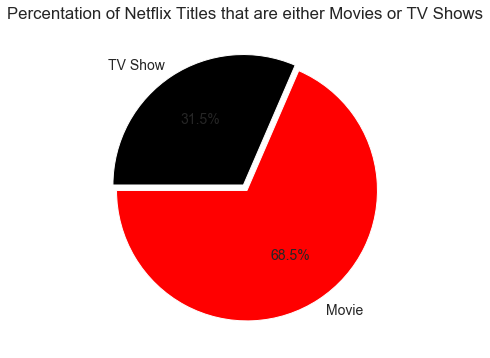

In [124]:
#1. Netflix Content By Type
plt.figure(figsize=(12,6))
plt.title("Percentation of Netflix Titles that are either Movies or TV Shows")
g = plt.pie(merged_df.type.value_counts(),explode=(0.025,0.025), labels=merged_df.type.value_counts().index, colors=['red','black'],autopct='%1.1f%%', startangle=180)
plt.show()


C:\Users\haifa\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.
C:\Users\haifa\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """
C:\Users\haifa\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


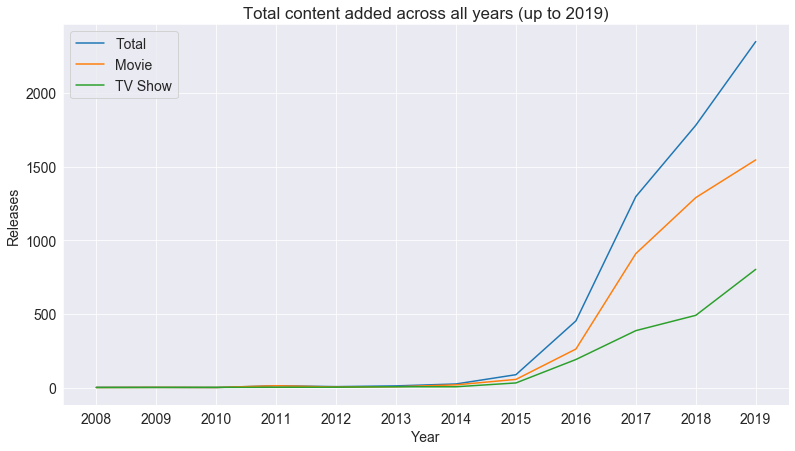

In [125]:
#2. Amount of Content as a Function of Time
netflix_movies_df = merged_df[merged_df.type.str.contains("Movie")]
netflix_shows_df = merged_df[merged_df.type.str.contains("TV Show")]
merged_df.year_added = pd.DatetimeIndex(merged_df.date_added).year
netflix_movies_df.year_added = pd.DatetimeIndex(netflix_movies_df.date_added).year
netflix_shows_df.year_added = pd.DatetimeIndex(netflix_shows_df.date_added).year

netflix_year_df =merged_df.year_added.value_counts().to_frame().reset_index().rename(columns={"index": "year", "year_added":"count"})
netflix_year_df = netflix_year_df[netflix_year_df.year != 2020]

movies_year_df = netflix_movies_df.year_added.value_counts().to_frame().reset_index().rename(columns={"index": "year", "year_added":"count"})
movies_year_df = movies_year_df[movies_year_df != 2020]

shows_year_df = netflix_shows_df.year_added.value_counts().to_frame().reset_index().rename(columns={"index": "year", "year_added":"count"})
shows_year_df = shows_year_df[shows_year_df != 2020]

fig, ax = plt.subplots(figsize=(13, 7))
sns.lineplot(data=netflix_year_df, x='year', y='date_added')
sns.lineplot(data=movies_year_df, x='year', y='date_added')
sns.lineplot(data=shows_year_df, x='year', y='date_added')
ax.set_xticks(np.arange(2008, 2020, 1))
plt.title("Total content added across all years (up to 2019)")
plt.legend(['Total','Movie','TV Show'])
plt.ylabel("Releases")
plt.xlabel("Year")
plt.show()


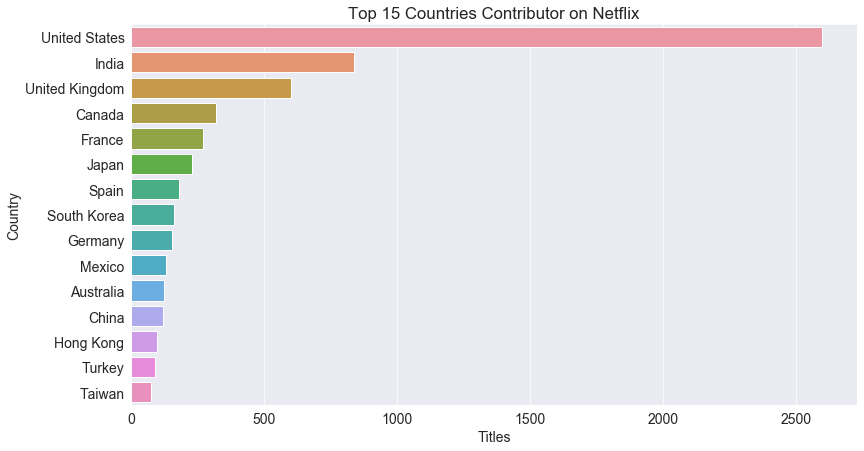

In [126]:
#3. Countries by the Amount of the Produces Content
filtered_countries = merged_df.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
filtered_countries = filtered_countries[filtered_countries != 'Country Unavailable']
plt.figure(figsize=(13,7))
g = sns.countplot(y = filtered_countries, order=filtered_countries.value_counts().index[:15])
plt.title('Top 15 Countries Contributor on Netflix')
plt.xlabel('Titles')
plt.ylabel('Country')
plt.show()


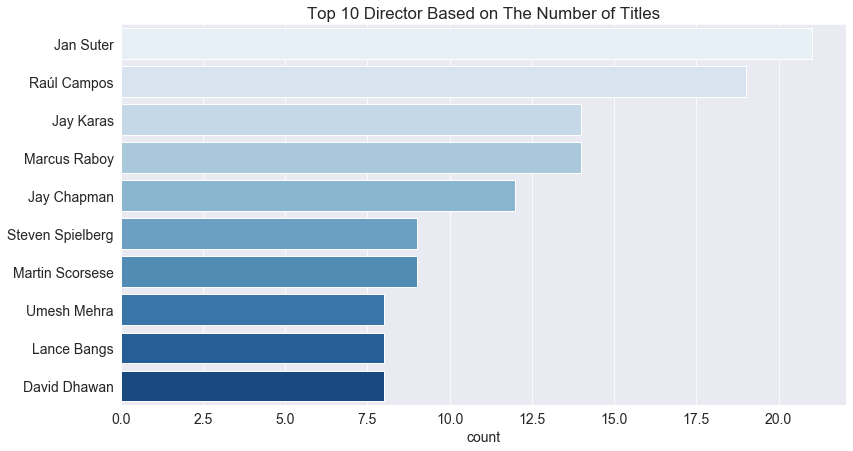

In [127]:
#4. Top Directors on Netflix
filtered_directors = merged_df[merged_df.director != 'No Director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Director Based on The Number of Titles')
sns.countplot(y = filtered_directors, order=filtered_directors.value_counts().index[:10], palette='Blues')
plt.show()


In [128]:
director_list=["Raúl Campos","Jan Suter","Marcus Raboy","Jay Karas","Jay Chapman","Martin Scorsese","Steven Spielberg","Johnnie To","Lance Bangs","Cathy Garcia-Molina"]

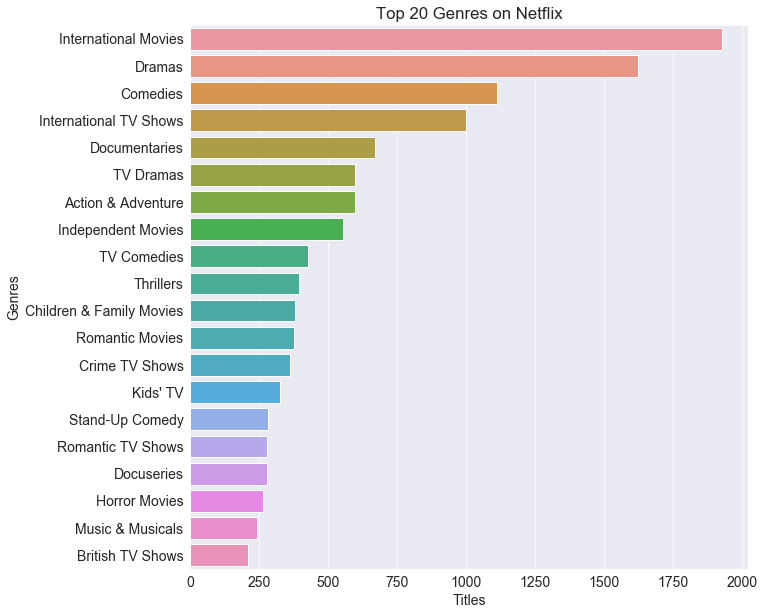

In [129]:
#5. Top Genres on Netflix
filtered_genres = merged_df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);

plt.figure(figsize=(10,10))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()


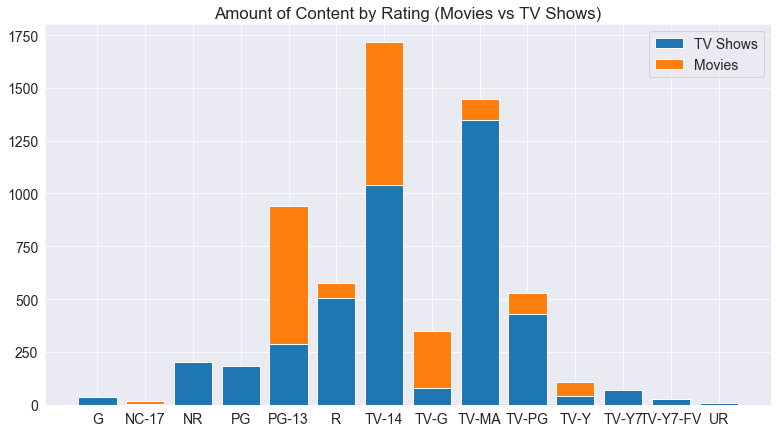

In [130]:
#6. Amount of Content By Rating
order = merged_df.rating.unique()
count_movies = netflix_movies_df.groupby('rating')['title'].count().reset_index()
count_shows = netflix_shows_df.groupby('rating')['title'].count().reset_index()
count_shows = count_shows.append([{"rating" : "NC-17", "title" : 0},{"rating" : "PG-13", "title" : 0},{"rating" : "UR", "title" : 0}], ignore_index=True)
count_shows.sort_values(by="rating", ascending=True)
plt.figure(figsize=(13,7))
plt.title('Amount of Content by Rating (Movies vs TV Shows)')
plt.bar(count_movies.rating, count_movies.title)
plt.bar(count_movies.rating, count_shows.title, bottom=count_movies.title)
plt.legend(['TV Shows', 'Movies'])
plt.show()


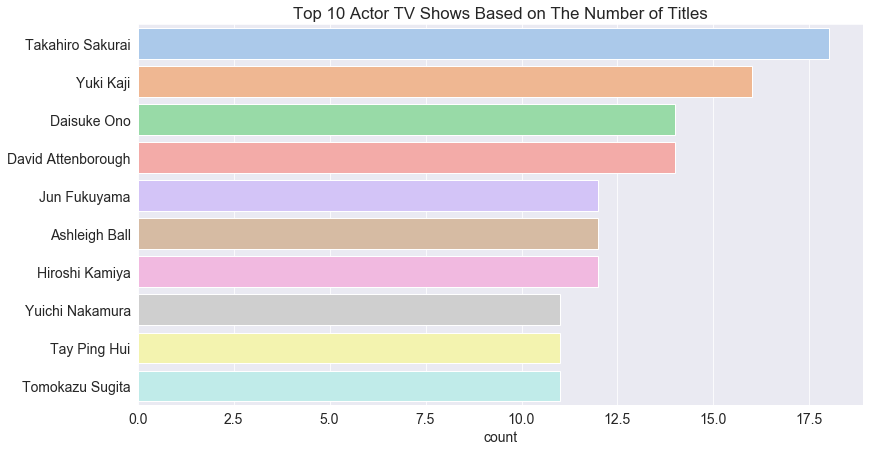

In [131]:
#7. Top Actor TV Shows on Netflix
filtered_cast_shows = netflix_shows_df[netflix_shows_df.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Actor TV Shows Based on The Number of Titles')
sns.countplot(y = filtered_cast_shows, order=filtered_cast_shows.value_counts().index[:10], palette='pastel')
plt.show()


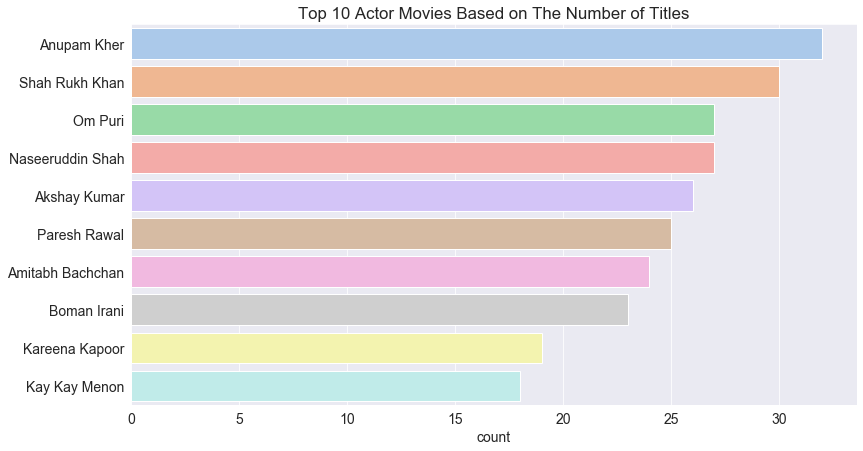

In [132]:
#top actor movies
filtered_cast_movie = netflix_movies_df[netflix_movies_df.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Actor Movies Based on The Number of Titles')
sns.countplot(y = filtered_cast_movie, order=filtered_cast_movie.value_counts().index[:10], palette='pastel')
plt.show()


In [133]:
filter_df=merged_df[merged_df["imdbRating"]>0]
print(len(filter_df))

5327


In [172]:
filter_df2=filter_df.copy()
filter_df2

,type,title,director,cast,country,date_added,rating,duration,listed_in,imdbRating,imdbVotes,language
0,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",TV-PG,90 min,"Children & Family Movies, Comedies",3.3,311,English
1,Movie,Jandino: Whatever it Takes,No Director,Jandino Asporaat,United Kingdom,"September 9, 2016",TV-MA,94 min,Stand-Up Comedy,4.8,23,"English, Dutch"
2,TV Show,Transformers Prime,No Director,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",TV-Y7-FV,1 Season,Kids' TV,7.9,5454,English
3,TV Show,Transformers: Robots in Disguise,No Director,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",TV-Y7,1 Season,Kids' TV,6.0,842,English
5,TV Show,Apaches,No Director,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",5.9,292,"French, Arabic"
...,...,...,...,...,...,...,...,...,...,...,...,...
6218,TV Show,Talking Tom and Friends,No Director,"Colin Hanks, Tom Kenny, James Adomian, Lisa Sc...","Cyprus, Austria, Thailand","April 10, 2019",TV-G,2 Seasons,"Kids' TV, TV Comedies",6.2,274,English
6219,TV Show,Pokémon the Series,No Director,"Sarah Natochenny, Laurie Hymes, Jessica Paquet...",Japan,"April 1, 2019",TV-Y7-FV,2 Seasons,"Anime Series, Kids' TV",5.8,231,Japanese
6220,TV Show,Justin Time,No Director,"Gage Munroe, Scott McCord, Jenna Warren",Canada,"April 1, 2016",TV-Y,2 Seasons,Kids' TV,6.7,177,"English, French"
6221,TV Show,Terrace House: Boys & Girls in the City,No Director,"You, Reina Triendl, Ryota Yamasato, Yoshimi To...",Japan,"April 1, 2016",TV-14,2 Seasons,"International TV Shows, Reality TV",8.3,253,Japanese


In [135]:
filter_df2.isnull().sum()

type          0
title         0
director      0
cast          0
country       0
date_added    0
rating        0
duration      0
listed_in     0
imdbRating    0
imdbVotes     0
language      0
dtype: int64

In [136]:
# count = 0
# else_count=0
# for time in filter_df2["duration"]:
#     if "min" in time:
#         count +=1
#     else:
#        else_count +=1
# print(count)
# print(else_count)
    
 

In [173]:
count = 0
for time in filter_df2["duration"]:
    if "min" in time:
        filter_df2.loc[count,"time"]=time
        filter_df2.loc[count,"season"]=0
    else:
        filter_df2.loc[count,"time"]=0
        filter_df2.loc[count,"season"]=time
    count +=1

print(len(filter_df2))


6119


In [174]:
clean_df=filter_df2.dropna()

In [175]:
clean_df=pd.get_dummies(filter_df2, columns=['type'])


In [176]:
count=0
for name in clean_df["country"]:
    # print(name)
    if "United States" in str(name):
        clean_df.loc[count,"country"] = 1
    else:
        clean_df.loc[count,"country"]= 0
    count +=1


In [177]:
count=0
for name in clean_df["language"]:
    # print(name)
    if "English" in str(name):
        clean_df.loc[count,"language"] = 1
    else:
        clean_df.loc[count,"language"]= 0
    count +=1


In [178]:
director_list=clean_df.groupby("director").count()["title"].sort_values(ascending=False)

director_list.head(11)

director
No Director               1618
Raúl Campos, Jan Suter      16
Marcus Raboy                14
Jay Karas                   12
Jay Chapman                 11
Martin Scorsese              9
Steven Spielberg             9
Johnnie To                   8
Lance Bangs                  8
Cathy Garcia-Molina          7
Ryan Polito                  7
Name: title, dtype: int64

In [179]:
director_list=["Raúl Campos","Jan Suter","Marcus Raboy","Jay Karas","Jay Chapman","Martin Scorsese","Steven Spielberg","Johnnie To","Lance Bangs","Cathy Garcia-Molina"]

In [180]:
count = 0
for name in clean_df["director"]:
    # print(name)
    for director in director_list:
        if director == name:
            clean_df.loc[count,"director"]=1
        else:
            clean_df.loc[count,"director"]=0
    count +=1

In [181]:
filtered_genres = clean_df.listed_in.str.split(', ', expand=True).stack().sort_values(ascending=False)
genre=filtered_genres.value_counts()
genre_list=["International Movies","Dramas","Comedies","International TV Shows","Documentaries","Action & Adventure","TV Dramas","Thrillers","TV Comedies","Romantic Movies","Crime TV Shows","Children & Family Movies","Kids' TV","Stand-Up Comedy","Horror Movies","Docuseries","Romantic TV Shows","Music & Musicals","British TV Shows"]
genre.head(20)

International Movies        1599
Dramas                      1454
Comedies                     945
International TV Shows       812
Documentaries                556
Action & Adventure           532
Independent Movies           513
TV Dramas                    505
Thrillers                    362
TV Comedies                  357
Romantic Movies              331
Crime TV Shows               325
Children & Family Movies     305
Kids' TV                     269
Stand-Up Comedy              250
Horror Movies                236
Docuseries                   229
Romantic TV Shows            211
Music & Musicals             194
British TV Shows             180
dtype: int64

In [182]:
count = 0
for type_1 in clean_df["listed_in"]:
    for genre in genre_list:
        if genre in type_1:
            clean_df.loc[count,"genre"]=1
        else:
            clean_df.loc[count,"genre"]=0
    count +=1

TypeError: argument of type 'float' is not iterable

In [187]:
cast=filtered_cast_shows.value_counts()
cast.head(10)
cast_shows=["Takahiro Sakurai","Yuki Kaji","David Attenborough","David Attenborough","Jun Fukuyama","Ashleigh Ball","Hiroshi Kamiya","Yuichi Nakamura","Tay Ping Hui","Tomokazu Sugita"]

In [188]:
count = 0
for cast in clean_df["cast"]:
    for name in cast_shows:
        if name in cast:
            clean_df.loc[count,"cast_shows"]=1
        else:
            clean_df.loc[count,"cast_shows"]=0
    count +=1

TypeError: argument of type 'float' is not iterable

In [190]:
movie=filtered_cast_movie.value_counts()
movie.head(10)
cast_movies=["Anupam Kher","Anupam Kher","Om Puri","Naseeruddin Shah","Akshay Kumar","Paresh Rawal","Amitabh Bachchan","Boman Irani","Kareena Kapoor","Kay Kay Menon"]

In [191]:
count = 0
for cast in clean_df["cast"]:
    for name in cast_movies:
        if name in cast:
            clean_df.loc[count,"cast_movies"]=1
        else:
            clean_df.loc[count,"cast_movies"]=0
    count +=1

TypeError: argument of type 'float' is not iterable

In [184]:
clean_df['time'] = clean_df['time'].str.replace("min", "")
clean_df['season'] = clean_df['season'].str.replace("Seasons","")
clean_df['season'] = clean_df['season'].str.replace("Season","")
clean_df.time.fillna(0,inplace=True)
clean_df.season.fillna(0,inplace=True)

In [185]:
clean_df["date_added"]=pd.DatetimeIndex(clean_df.date_added).year

In [192]:
clean_df

,title,director,cast,country,date_added,rating,duration,listed_in,imdbRating,imdbVotes,language,time,season,type_Movie,type_TV Show,genre,cast_shows,cast_movies
0,Norm of the North: King Sized Adventure,0,"Alan Marriott, Andrew Toth, Brian Dobson, Cole...",1,2019.0,TV-PG,90 min,"Children & Family Movies, Comedies",3.3,311.0,1,90,0,1.0,0.0,0.0,0.0,0.0
1,Jandino: Whatever it Takes,0,Jandino Asporaat,0,2016.0,TV-MA,94 min,Stand-Up Comedy,4.8,23.0,1,94,0,1.0,0.0,0.0,0.0,0.0
2,Transformers Prime,0,"Peter Cullen, Sumalee Montano, Frank Welker, J...",1,2018.0,TV-Y7-FV,1 Season,Kids' TV,7.9,5454.0,1,0,1,0.0,1.0,0.0,0.0,0.0
3,Transformers: Robots in Disguise,0,"Will Friedle, Darren Criss, Constance Zimmer, ...",1,2018.0,TV-Y7,1 Season,Kids' TV,6.0,842.0,1,0,1,0.0,1.0,0.0,0.0,0.0
5,Apaches,0,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",1,2017.0,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",5.9,292.0,1,110,0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6188,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN
6194,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN
6195,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN
6199,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN


In [193]:
clean_df=clean_df.drop(columns=["title","cast","rating","duration","listed_in"])
netflix_imdb=clean_df.dropna()
netflix_imdb.head()

,director,country,date_added,imdbRating,imdbVotes,language,time,season,type_Movie,type_TV Show,genre,cast_shows,cast_movies
0,0,1,2019.0,3.3,311.0,1,90,0,1.0,0.0,0.0,0.0,0.0
1,0,0,2016.0,4.8,23.0,1,94,0,1.0,0.0,0.0,0.0,0.0
2,0,1,2018.0,7.9,5454.0,1,0,1,0.0,1.0,0.0,0.0,0.0
3,0,1,2018.0,6.0,842.0,1,0,1,0.0,1.0,0.0,0.0,0.0
5,0,1,2017.0,5.9,292.0,1,110,0,0.0,1.0,0.0,0.0,0.0


In [195]:
netflix_imdb.to_csv("netflix_imdb.csv")

# 1. The most content type on Netflix is movies,
# 2. The popular streaming platform started gaining traction after 2014. Since then, the amount of content added has been increasing significantly,
# 3. The country by the amount of the produces content is the United States,
# 4. The most popular director on Netflix , with the most titles, is Jan Suter.
# 5. International Movies is a genre that is mostly in Netflix,
# 6. The largest count of Netflix content is made with a “TV-14” rating,
# 7. The most popular actor on Netflix TV Shows based on the number of titles is Takahiro Sakurai,
# 8. The most popular actor on Netflix movie, based on the number of titles, is Anupam Kher.